In [ ]:
import pandas as pd # This imports pandas which will allow us to analyse data from a csv file

In [ ]:
df = pd.read_csv('/content/Retail dataset of a global superstore F7.csv')

In [ ]:
df # This shows us the csv file at a glance looking at the top 5 and bottom 5 rows.  This allows me to do an initial investigation to the layout of df.

# Need to remove Rod ID column, split first name and secondname and do some data enrichment.

,Row ID,Order ID,Order Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Unit Sale,Quantity,Unit Cost
0,1,CA-2017-152156,08/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,261.9600,4,261.26
1,2,CA-2017-152156,08/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,731.9400,4,731.61
2,3,CA-2017-138688,12/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,california,90036,West,OFF-LA-10000240,Office Supplies,14.6200,9,13.97
3,4,US-2016-108966,11/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,florida,33311,South,FUR-TA-10000577,Furniture,957.5775,3,956.90
4,5,US-2016-108966,11/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,florida,33311,South,OFF-ST-10000760,Office Supplies,22.3680,3,22.08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,1496,CA-2018-152485,04/09/2018,Standard Class,JD-15790,John Dryer,Consumer,United States,Coppell,Texas,75019,Central,OFF-AR-10003759,Office Supplies,10.1920,7,9.79
1496,1497,CA-2018-152485,04/09/2018,Standard Class,JD-15790,John Dryer,Consumer,United States,Coppell,Texas,75019,Central,OFF-ST-10004950,Office Supplies,16.7840,7,16.26
1497,1498,CA-2018-152485,04/09/2018,Standard Class,JD-15790,John Dryer,Consumer,United States,Coppell,Texas,75019,Central,OFF-AR-10001940,Office Supplies,13.1200,7,12.32
1498,1499,CA-2017-141586,17/10/2017,First Class,NK-18490,Neil Knudson,Home Office,United States,San Francisco,California,94122,West,OFF-BI-10003981,Office Supplies,18.1600,9,17.91


In [ ]:
df.info() # gives me the specific details of each columns and lets me know already that there are 2 missing values in column 7 (8) country.

#another problem here as well is that Order date is a string data type and this needs changing to date

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         1500 non-null   int64  
 1   Order ID       1500 non-null   object 
 2   Order Date     1500 non-null   object 
 3   Ship Mode      1500 non-null   object 
 4   Customer ID    1500 non-null   object 
 5   Customer Name  1500 non-null   object 
 6   Segment        1500 non-null   object 
 7   Country        1498 non-null   object 
 8   City           1500 non-null   object 
 9   State          1500 non-null   object 
 10  Postal Code    1500 non-null   int64  
 11  Region         1500 non-null   object 
 12  Product ID     1500 non-null   object 
 13  Category       1500 non-null   object 
 14  Unit Sale      1500 non-null   float64
 15  Quantity       1500 non-null   int64  
 16  Unit Cost      1500 non-null   float64
dtypes: float64(2), int64(3), object(12)
memory usage: 19

In [ ]:
df.describe() #This might be useful for answering specific questions.  It looks at the numerical statistics from columns in df


,Row ID,Postal Code,Unit Sale,Quantity,Unit Cost
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.00000
mean,750.500000,53008.095333,232.729734,5.072667,232.23306
std,433.157015,31787.356924,552.541867,3.079238,552.53676
min,1.000000,1841.000000,1.080000,1.000000,0.28000
25%,375.750000,19805.000000,17.417500,2.000000,16.82500
50%,750.500000,48911.000000,53.672000,5.000000,53.43000
75%,1125.250000,85204.000000,211.225000,8.000000,210.44250
max,1500.000000,98661.000000,8159.952000,9.000000,8159.36000


In [ ]:
df.isnull().any()


Row ID           False
Order ID         False
Order Date       False
Ship Mode        False
Customer ID      False
Customer Name    False
Segment          False
Country           True
City             False
State            False
Postal Code      False
Region           False
Product ID       False
Category         False
Unit Sale        False
Quantity         False
Unit Cost        False
dtype: bool

In [ ]:
df.isnull().sum() # This confirms that there are 2 missing values in the country row.  This needs to be fixed.

Row ID           0
Order ID         0
Order Date       0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          2
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Unit Sale        0
Quantity         0
Unit Cost        0
dtype: int64

In [ ]:
df['Country']=df['Country'].fillna('United States') # Im now going to fill the missing values with United States as all data entries in this table are from the US

In [ ]:
df.isnull().sum() # Re Run this to check country no longer has missing values. and its gone to 0 which is good.

Row ID           0
Order ID         0
Order Date       0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Unit Sale        0
Quantity         0
Unit Cost        0
dtype: int64

In [ ]:
df.columns # Another check at the column titles and these look okay.

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Mode', 'Customer ID',
       'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Product ID', 'Category', 'Unit Sale', 'Quantity',
       'Unit Cost'],
      dtype='object')

In [ ]:
dfcopy= df.copy() # Just making a copy of my brilliant work so far :)

In [ ]:
dfcopy

,Row ID,Order ID,Order Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Unit Sale,Quantity,Unit Cost
0,1,CA-2017-152156,08/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,261.9600,4,261.26
1,2,CA-2017-152156,08/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,731.9400,4,731.61
2,3,CA-2017-138688,12/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,california,90036,West,OFF-LA-10000240,Office Supplies,14.6200,9,13.97
3,4,US-2016-108966,11/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,florida,33311,South,FUR-TA-10000577,Furniture,957.5775,3,956.90
4,5,US-2016-108966,11/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,florida,33311,South,OFF-ST-10000760,Office Supplies,22.3680,3,22.08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,1496,CA-2018-152485,04/09/2018,Standard Class,JD-15790,John Dryer,Consumer,United States,Coppell,Texas,75019,Central,OFF-AR-10003759,Office Supplies,10.1920,7,9.79
1496,1497,CA-2018-152485,04/09/2018,Standard Class,JD-15790,John Dryer,Consumer,United States,Coppell,Texas,75019,Central,OFF-ST-10004950,Office Supplies,16.7840,7,16.26
1497,1498,CA-2018-152485,04/09/2018,Standard Class,JD-15790,John Dryer,Consumer,United States,Coppell,Texas,75019,Central,OFF-AR-10001940,Office Supplies,13.1200,7,12.32
1498,1499,CA-2017-141586,17/10/2017,First Class,NK-18490,Neil Knudson,Home Office,United States,San Francisco,California,94122,West,OFF-BI-10003981,Office Supplies,18.1600,9,17.91


In [ ]:
#Time to clean
#dropping the Row ID column # working with my new copied data

dfcopy=dfcopy.drop(columns = 'Row ID')


In [ ]:
dfcopy # Checked my data again and happy to see that Row ID has gone.

,Order ID,Order Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Unit Sale,Quantity,Unit Cost
0,CA-2017-152156,08/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,261.9600,4,261.26
1,CA-2017-152156,08/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,731.9400,4,731.61
2,CA-2017-138688,12/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,california,90036,West,OFF-LA-10000240,Office Supplies,14.6200,9,13.97
3,US-2016-108966,11/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,florida,33311,South,FUR-TA-10000577,Furniture,957.5775,3,956.90
4,US-2016-108966,11/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,florida,33311,South,OFF-ST-10000760,Office Supplies,22.3680,3,22.08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,CA-2018-152485,04/09/2018,Standard Class,JD-15790,John Dryer,Consumer,United States,Coppell,Texas,75019,Central,OFF-AR-10003759,Office Supplies,10.1920,7,9.79
1496,CA-2018-152485,04/09/2018,Standard Class,JD-15790,John Dryer,Consumer,United States,Coppell,Texas,75019,Central,OFF-ST-10004950,Office Supplies,16.7840,7,16.26
1497,CA-2018-152485,04/09/2018,Standard Class,JD-15790,John Dryer,Consumer,United States,Coppell,Texas,75019,Central,OFF-AR-10001940,Office Supplies,13.1200,7,12.32
1498,CA-2017-141586,17/10/2017,First Class,NK-18490,Neil Knudson,Home Office,United States,San Francisco,California,94122,West,OFF-BI-10003981,Office Supplies,18.1600,9,17.91


In [ ]:
#Need to check if there are any duplicate rows as well.  There were none.

duplicate_row=dfcopy[dfcopy.duplicated()]
print('The duplicates are below: '  )
print(duplicate_row)

The duplicates are below: 
Empty DataFrame
Columns: [Order ID, Order Date, Ship Mode, Customer ID, Customer Name, Segment, Country, City, State, Postal Code, Region, Product ID, Category, Unit Sale, Quantity, Unit Cost]
Index: []


In [ ]:
#Now need to convert the date column

dfcopy['Order Date'] = pd.to_datetime(dfcopy['Order Date'])

<ipython-input-18-e9357648ac62>:3: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  dfcopy['Order Date'] = pd.to_datetime(dfcopy['Order Date'])


In [ ]:
#Googled how to make python know I want day first

date_string = "31-01-2022"
parsed_date = pd.to_datetime(date_string, dayfirst=True)

In [ ]:
dfcopy['Order Date'] = pd.to_datetime(dfcopy['Order Date']) # rerun this and dont get inconsistent parsed dates message, all good.

In [ ]:
dfcopy.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Order ID       1500 non-null   object        
 1   Order Date     1500 non-null   datetime64[ns]
 2   Ship Mode      1500 non-null   object        
 3   Customer ID    1500 non-null   object        
 4   Customer Name  1500 non-null   object        
 5   Segment        1500 non-null   object        
 6   Country        1500 non-null   object        
 7   City           1500 non-null   object        
 8   State          1500 non-null   object        
 9   Postal Code    1500 non-null   int64         
 10  Region         1500 non-null   object        
 11  Product ID     1500 non-null   object        
 12  Category       1500 non-null   object        
 13  Unit Sale      1500 non-null   float64       
 14  Quantity       1500 non-null   int64         
 15  Unit Cost      1500 n

In [ ]:
dfcopy['Month Name'] = dfcopy['Order Date'].dt.month_name() #Inserting a Month Column


In [ ]:
dfcopy['Quarter'] = dfcopy['Order Date'].dt.quarter # This also added a quarter column to my data.  Quarter does not need the bracket because there is no function happening for the quarter, its just extracting.

In [ ]:
dfcopy['Year'] = dfcopy['Order Date'].dt.year # This extracts the year and adds the year column to my data set

In [ ]:
dfcopy # checked and all 3 new columns are there!

,Order ID,Order Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Unit Sale,Quantity,Unit Cost,Month Name,Quarter,Year
0,CA-2017-152156,2017-08-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,261.9600,4,261.26,August,3,2017
1,CA-2017-152156,2017-08-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,731.9400,4,731.61,August,3,2017
2,CA-2017-138688,2017-12-06,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,california,90036,West,OFF-LA-10000240,Office Supplies,14.6200,9,13.97,December,4,2017
3,US-2016-108966,2016-11-10,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,florida,33311,South,FUR-TA-10000577,Furniture,957.5775,3,956.90,November,4,2016
4,US-2016-108966,2016-11-10,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,florida,33311,South,OFF-ST-10000760,Office Supplies,22.3680,3,22.08,November,4,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,CA-2018-152485,2018-04-09,Standard Class,JD-15790,John Dryer,Consumer,United States,Coppell,Texas,75019,Central,OFF-AR-10003759,Office Supplies,10.1920,7,9.79,April,2,2018
1496,CA-2018-152485,2018-04-09,Standard Class,JD-15790,John Dryer,Consumer,United States,Coppell,Texas,75019,Central,OFF-ST-10004950,Office Supplies,16.7840,7,16.26,April,2,2018
1497,CA-2018-152485,2018-04-09,Standard Class,JD-15790,John Dryer,Consumer,United States,Coppell,Texas,75019,Central,OFF-AR-10001940,Office Supplies,13.1200,7,12.32,April,2,2018
1498,CA-2017-141586,2017-10-17,First Class,NK-18490,Neil Knudson,Home Office,United States,San Francisco,California,94122,West,OFF-BI-10003981,Office Supplies,18.1600,9,17.91,October,4,2017


In [ ]:
#Want to split the first and lastname from the Customer name column
dfcopy['FirstName'] = dfcopy['Customer Name'].str.split(' ', 1).str[0]
dfcopy['LastName'] = dfcopy['Customer Name'].str.split(' ', 1).str[1]

<ipython-input-26-32f7a558ac98>:2: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  dfcopy['FirstName'] = dfcopy['Customer Name'].str.split(' ', 1).str[0]
<ipython-input-26-32f7a558ac98>:3: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  dfcopy['LastName'] = dfcopy['Customer Name'].str.split(' ', 1).str[1]


In [ ]:
dfcopy

,Order ID,Order Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,...,Product ID,Category,Unit Sale,Quantity,Unit Cost,Month Name,Quarter,Year,FirstName,LastName
0,CA-2017-152156,2017-08-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,...,FUR-BO-10001798,Furniture,261.9600,4,261.26,August,3,2017,Claire,Gute
1,CA-2017-152156,2017-08-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,...,FUR-CH-10000454,Furniture,731.9400,4,731.61,August,3,2017,Claire,Gute
2,CA-2017-138688,2017-12-06,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,california,90036,...,OFF-LA-10000240,Office Supplies,14.6200,9,13.97,December,4,2017,Darrin,Van Huff
3,US-2016-108966,2016-11-10,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,florida,33311,...,FUR-TA-10000577,Furniture,957.5775,3,956.90,November,4,2016,Sean,O'Donnell
4,US-2016-108966,2016-11-10,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,florida,33311,...,OFF-ST-10000760,Office Supplies,22.3680,3,22.08,November,4,2016,Sean,O'Donnell
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,CA-2018-152485,2018-04-09,Standard Class,JD-15790,John Dryer,Consumer,United States,Coppell,Texas,75019,...,OFF-AR-10003759,Office Supplies,10.1920,7,9.79,April,2,2018,John,Dryer
1496,CA-2018-152485,2018-04-09,Standard Class,JD-15790,John Dryer,Consumer,United States,Coppell,Texas,75019,...,OFF-ST-10004950,Office Supplies,16.7840,7,16.26,April,2,2018,John,Dryer
1497,CA-2018-152485,2018-04-09,Standard Class,JD-15790,John Dryer,Consumer,United States,Coppell,Texas,75019,...,OFF-AR-10001940,Office Supplies,13.1200,7,12.32,April,2,2018,John,Dryer
1498,CA-2017-141586,2017-10-17,First Class,NK-18490,Neil Knudson,Home Office,United States,San Francisco,California,94122,...,OFF-BI-10003981,Office Supplies,18.1600,9,17.91,October,4,2017,Neil,Knudson


In [ ]:
#Can now drop the 'Customer Name' column due to splitting this

dfcopy=dfcopy.drop(columns = 'Customer Name')

#There is another way to do this by typing 'data.drop(Customer Name', axis=1, inplace=True) Axis=1 is the column Axis=0 would be a row

In [ ]:
dfcopy # This worked as Customer Name has now been removed

,Order ID,Order Date,Ship Mode,Customer ID,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Unit Sale,Quantity,Unit Cost,Month Name,Quarter,Year,FirstName,LastName
0,CA-2017-152156,2017-08-11,Second Class,CG-12520,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,261.9600,4,261.26,August,3,2017,Claire,Gute
1,CA-2017-152156,2017-08-11,Second Class,CG-12520,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,731.9400,4,731.61,August,3,2017,Claire,Gute
2,CA-2017-138688,2017-12-06,Second Class,DV-13045,Corporate,United States,Los Angeles,california,90036,West,OFF-LA-10000240,Office Supplies,14.6200,9,13.97,December,4,2017,Darrin,Van Huff
3,US-2016-108966,2016-11-10,Standard Class,SO-20335,Consumer,United States,Fort Lauderdale,florida,33311,South,FUR-TA-10000577,Furniture,957.5775,3,956.90,November,4,2016,Sean,O'Donnell
4,US-2016-108966,2016-11-10,Standard Class,SO-20335,Consumer,United States,Fort Lauderdale,florida,33311,South,OFF-ST-10000760,Office Supplies,22.3680,3,22.08,November,4,2016,Sean,O'Donnell
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,CA-2018-152485,2018-04-09,Standard Class,JD-15790,Consumer,United States,Coppell,Texas,75019,Central,OFF-AR-10003759,Office Supplies,10.1920,7,9.79,April,2,2018,John,Dryer
1496,CA-2018-152485,2018-04-09,Standard Class,JD-15790,Consumer,United States,Coppell,Texas,75019,Central,OFF-ST-10004950,Office Supplies,16.7840,7,16.26,April,2,2018,John,Dryer
1497,CA-2018-152485,2018-04-09,Standard Class,JD-15790,Consumer,United States,Coppell,Texas,75019,Central,OFF-AR-10001940,Office Supplies,13.1200,7,12.32,April,2,2018,John,Dryer
1498,CA-2017-141586,2017-10-17,First Class,NK-18490,Home Office,United States,San Francisco,California,94122,West,OFF-BI-10003981,Office Supplies,18.1600,9,17.91,October,4,2017,Neil,Knudson


In [ ]:
dfcopy['City']=dfcopy['City'].str.title() # This ensures all of the entries to the city column are converted to capital case.

In [ ]:
dfcopy['State']=dfcopy['State'].str.title()# AS above

In [ ]:
dfcopy['Region']=dfcopy['Region'].str.title() # AS above

In [ ]:
dfcopy # Can see this has worked as state florida in now capitalised and wasnt before

,Order ID,Order Date,Ship Mode,Customer ID,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Unit Sale,Quantity,Unit Cost,Month Name,Quarter,Year,FirstName,LastName
0,CA-2017-152156,2017-08-11,Second Class,CG-12520,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,261.9600,4,261.26,August,3,2017,Claire,Gute
1,CA-2017-152156,2017-08-11,Second Class,CG-12520,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,731.9400,4,731.61,August,3,2017,Claire,Gute
2,CA-2017-138688,2017-12-06,Second Class,DV-13045,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,14.6200,9,13.97,December,4,2017,Darrin,Van Huff
3,US-2016-108966,2016-11-10,Standard Class,SO-20335,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,957.5775,3,956.90,November,4,2016,Sean,O'Donnell
4,US-2016-108966,2016-11-10,Standard Class,SO-20335,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,22.3680,3,22.08,November,4,2016,Sean,O'Donnell
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,CA-2018-152485,2018-04-09,Standard Class,JD-15790,Consumer,United States,Coppell,Texas,75019,Central,OFF-AR-10003759,Office Supplies,10.1920,7,9.79,April,2,2018,John,Dryer
1496,CA-2018-152485,2018-04-09,Standard Class,JD-15790,Consumer,United States,Coppell,Texas,75019,Central,OFF-ST-10004950,Office Supplies,16.7840,7,16.26,April,2,2018,John,Dryer
1497,CA-2018-152485,2018-04-09,Standard Class,JD-15790,Consumer,United States,Coppell,Texas,75019,Central,OFF-AR-10001940,Office Supplies,13.1200,7,12.32,April,2,2018,John,Dryer
1498,CA-2017-141586,2017-10-17,First Class,NK-18490,Home Office,United States,San Francisco,California,94122,West,OFF-BI-10003981,Office Supplies,18.1600,9,17.91,October,4,2017,Neil,Knudson


In [ ]:
dfcopy.City.unique() # Another check that all of the City's look good and as intended

array(['Henderson', 'Los Angeles', 'Fort Lauderdale', 'Concord',
       'Seattle', 'Fort Worth', 'Madison', 'West Jordan', 'San Francisco',
       'Fremont', 'Philadelphia', 'Orem', 'Houston', 'Richardson',
       'Naperville', 'Melbourne', 'Eagan', 'Westland', 'Dover',
       'New Albany', 'New York City', 'Troy', 'Chicago', 'Gilbert',
       'Springfield', 'Jackson', 'Memphis', 'Decatur', 'Durham',
       'Columbia', 'Rochester', 'Minneapolis', 'Portland', 'Saint Paul',
       'Aurora', 'Charlotte', 'Orland Park', 'Urbandale', 'Columbus',
       'Bristol', 'Wilmington', 'Bloomington', 'Phoenix', 'Roseville',
       'Independence', 'Pasadena', 'Newark', 'Franklin', 'Scottsdale',
       'San Jose', 'Edmond', 'Carlsbad', 'San Antonio', 'Monroe',
       'Fairfield', 'Grand Prairie', 'Redlands', 'Hamilton', 'Westfield',
       'Akron', 'Denver', 'Dallas', 'Whittier', 'Saginaw', 'Medina',
       'Dublin', 'Detroit', 'Tampa', 'Santa Clara', 'Lakeville',
       'San Diego', 'Brentwood', 'Cha

In [ ]:
#feature Engineering
#Need to add Total Sales, Total Costs, Profit

#To find profit per unit
dfcopy['Profit Per Item'] = dfcopy['Unit Sale']-dfcopy['Unit Cost']

In [ ]:

dfcopy

,Order ID,Order Date,Ship Mode,Customer ID,Segment,Country,City,State,Postal Code,Region,...,Category,Unit Sale,Quantity,Unit Cost,Month Name,Quarter,Year,FirstName,LastName,Profit Per Item
0,CA-2017-152156,2017-08-11,Second Class,CG-12520,Consumer,United States,Henderson,Kentucky,42420,South,...,Furniture,261.9600,4,261.26,August,3,2017,Claire,Gute,0.7000
1,CA-2017-152156,2017-08-11,Second Class,CG-12520,Consumer,United States,Henderson,Kentucky,42420,South,...,Furniture,731.9400,4,731.61,August,3,2017,Claire,Gute,0.3300
2,CA-2017-138688,2017-12-06,Second Class,DV-13045,Corporate,United States,Los Angeles,California,90036,West,...,Office Supplies,14.6200,9,13.97,December,4,2017,Darrin,Van Huff,0.6500
3,US-2016-108966,2016-11-10,Standard Class,SO-20335,Consumer,United States,Fort Lauderdale,Florida,33311,South,...,Furniture,957.5775,3,956.90,November,4,2016,Sean,O'Donnell,0.6775
4,US-2016-108966,2016-11-10,Standard Class,SO-20335,Consumer,United States,Fort Lauderdale,Florida,33311,South,...,Office Supplies,22.3680,3,22.08,November,4,2016,Sean,O'Donnell,0.2880
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,CA-2018-152485,2018-04-09,Standard Class,JD-15790,Consumer,United States,Coppell,Texas,75019,Central,...,Office Supplies,10.1920,7,9.79,April,2,2018,John,Dryer,0.4020
1496,CA-2018-152485,2018-04-09,Standard Class,JD-15790,Consumer,United States,Coppell,Texas,75019,Central,...,Office Supplies,16.7840,7,16.26,April,2,2018,John,Dryer,0.5240
1497,CA-2018-152485,2018-04-09,Standard Class,JD-15790,Consumer,United States,Coppell,Texas,75019,Central,...,Office Supplies,13.1200,7,12.32,April,2,2018,John,Dryer,0.8000
1498,CA-2017-141586,2017-10-17,First Class,NK-18490,Home Office,United States,San Francisco,California,94122,West,...,Office Supplies,18.1600,9,17.91,October,4,2017,Neil,Knudson,0.2500


In [ ]:
#Total Profit
dfcopy['Total Profit'] = dfcopy['Profit Per Item'] *dfcopy['Quantity']

In [ ]:
dfcopy

,Order ID,Order Date,Ship Mode,Customer ID,Segment,Country,City,State,Postal Code,Region,...,Unit Sale,Quantity,Unit Cost,Month Name,Quarter,Year,FirstName,LastName,Profit Per Item,Total Profit
0,CA-2017-152156,2017-08-11,Second Class,CG-12520,Consumer,United States,Henderson,Kentucky,42420,South,...,261.9600,4,261.26,August,3,2017,Claire,Gute,0.7000,2.8000
1,CA-2017-152156,2017-08-11,Second Class,CG-12520,Consumer,United States,Henderson,Kentucky,42420,South,...,731.9400,4,731.61,August,3,2017,Claire,Gute,0.3300,1.3200
2,CA-2017-138688,2017-12-06,Second Class,DV-13045,Corporate,United States,Los Angeles,California,90036,West,...,14.6200,9,13.97,December,4,2017,Darrin,Van Huff,0.6500,5.8500
3,US-2016-108966,2016-11-10,Standard Class,SO-20335,Consumer,United States,Fort Lauderdale,Florida,33311,South,...,957.5775,3,956.90,November,4,2016,Sean,O'Donnell,0.6775,2.0325
4,US-2016-108966,2016-11-10,Standard Class,SO-20335,Consumer,United States,Fort Lauderdale,Florida,33311,South,...,22.3680,3,22.08,November,4,2016,Sean,O'Donnell,0.2880,0.8640
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,CA-2018-152485,2018-04-09,Standard Class,JD-15790,Consumer,United States,Coppell,Texas,75019,Central,...,10.1920,7,9.79,April,2,2018,John,Dryer,0.4020,2.8140
1496,CA-2018-152485,2018-04-09,Standard Class,JD-15790,Consumer,United States,Coppell,Texas,75019,Central,...,16.7840,7,16.26,April,2,2018,John,Dryer,0.5240,3.6680
1497,CA-2018-152485,2018-04-09,Standard Class,JD-15790,Consumer,United States,Coppell,Texas,75019,Central,...,13.1200,7,12.32,April,2,2018,John,Dryer,0.8000,5.6000
1498,CA-2017-141586,2017-10-17,First Class,NK-18490,Home Office,United States,San Francisco,California,94122,West,...,18.1600,9,17.91,October,4,2017,Neil,Knudson,0.2500,2.2500


In [ ]:
#To create Total Sales
dfcopy['Total Sales'] = dfcopy['Quantity'] *dfcopy['Unit Sale']

In [ ]:
#To create Total Costs
dfcopy['Total Costs'] = dfcopy['Quantity'] *dfcopy['Unit Cost']

In [ ]:
dfcopy

,Order ID,Order Date,Ship Mode,Customer ID,Segment,Country,City,State,Postal Code,Region,...,Unit Cost,Month Name,Quarter,Year,FirstName,LastName,Profit Per Item,Total Profit,Total Sales,Total Costs
0,CA-2017-152156,2017-08-11,Second Class,CG-12520,Consumer,United States,Henderson,Kentucky,42420,South,...,261.26,August,3,2017,Claire,Gute,0.7000,2.8000,1047.8400,1045.04
1,CA-2017-152156,2017-08-11,Second Class,CG-12520,Consumer,United States,Henderson,Kentucky,42420,South,...,731.61,August,3,2017,Claire,Gute,0.3300,1.3200,2927.7600,2926.44
2,CA-2017-138688,2017-12-06,Second Class,DV-13045,Corporate,United States,Los Angeles,California,90036,West,...,13.97,December,4,2017,Darrin,Van Huff,0.6500,5.8500,131.5800,125.73
3,US-2016-108966,2016-11-10,Standard Class,SO-20335,Consumer,United States,Fort Lauderdale,Florida,33311,South,...,956.90,November,4,2016,Sean,O'Donnell,0.6775,2.0325,2872.7325,2870.70
4,US-2016-108966,2016-11-10,Standard Class,SO-20335,Consumer,United States,Fort Lauderdale,Florida,33311,South,...,22.08,November,4,2016,Sean,O'Donnell,0.2880,0.8640,67.1040,66.24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,CA-2018-152485,2018-04-09,Standard Class,JD-15790,Consumer,United States,Coppell,Texas,75019,Central,...,9.79,April,2,2018,John,Dryer,0.4020,2.8140,71.3440,68.53
1496,CA-2018-152485,2018-04-09,Standard Class,JD-15790,Consumer,United States,Coppell,Texas,75019,Central,...,16.26,April,2,2018,John,Dryer,0.5240,3.6680,117.4880,113.82
1497,CA-2018-152485,2018-04-09,Standard Class,JD-15790,Consumer,United States,Coppell,Texas,75019,Central,...,12.32,April,2,2018,John,Dryer,0.8000,5.6000,91.8400,86.24
1498,CA-2017-141586,2017-10-17,First Class,NK-18490,Home Office,United States,San Francisco,California,94122,West,...,17.91,October,4,2017,Neil,Knudson,0.2500,2.2500,163.4400,161.19


In [ ]:
dfcopy.columns

Index(['Order ID', 'Order Date', 'Ship Mode', 'Customer ID', 'Segment',
       'Country', 'City', 'State', 'Postal Code', 'Region', 'Product ID',
       'Category', 'Unit Sale', 'Quantity', 'Unit Cost', 'Month Name',
       'Quarter', 'Year', 'FirstName', 'LastName', 'Profit Per Item',
       'Total Profit', 'Total Sales', 'Total Costs'],
      dtype='object')

In [ ]:
#Going to rearrange the column order
dfcopy = dfcopy[['Order ID', 'Order Date', 'Month Name',
       'Quarter', 'Year', 'FirstName', 'LastName','Ship Mode', 'Customer ID',  'Segment',
       'Country', 'City', 'State', 'Postal Code', 'Region', 'Product ID',
       'Category', 'Quantity','Unit Sale',  'Unit Cost',  'Profit Per Item',
       'Total Profit', 'Total Sales', 'Total Costs']]

In [78]:
dfcopy # After checking this looks a lot neater and all financial information is now grouped together.
# Data is cleaned and enriched at this point.

,Order ID,Order Date,Month Name,Quarter,Year,FirstName,LastName,Ship Mode,Customer ID,Segment,...,Region,Product ID,Category,Quantity,Unit Sale,Unit Cost,Profit Per Item,Total Profit,Total Sales,Total Costs
0,CA-2017-152156,2017-08-11,August,3,2017,Claire,Gute,Second Class,CG-12520,Consumer,...,South,FUR-BO-10001798,Furniture,4,261.9600,261.26,0.7000,2.8000,1047.8400,1045.04
1,CA-2017-152156,2017-08-11,August,3,2017,Claire,Gute,Second Class,CG-12520,Consumer,...,South,FUR-CH-10000454,Furniture,4,731.9400,731.61,0.3300,1.3200,2927.7600,2926.44
2,CA-2017-138688,2017-12-06,December,4,2017,Darrin,Van Huff,Second Class,DV-13045,Corporate,...,West,OFF-LA-10000240,Office Supplies,9,14.6200,13.97,0.6500,5.8500,131.5800,125.73
3,US-2016-108966,2016-11-10,November,4,2016,Sean,O'Donnell,Standard Class,SO-20335,Consumer,...,South,FUR-TA-10000577,Furniture,3,957.5775,956.90,0.6775,2.0325,2872.7325,2870.70
4,US-2016-108966,2016-11-10,November,4,2016,Sean,O'Donnell,Standard Class,SO-20335,Consumer,...,South,OFF-ST-10000760,Office Supplies,3,22.3680,22.08,0.2880,0.8640,67.1040,66.24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,CA-2018-152485,2018-04-09,April,2,2018,John,Dryer,Standard Class,JD-15790,Consumer,...,Central,OFF-AR-10003759,Office Supplies,7,10.1920,9.79,0.4020,2.8140,71.3440,68.53
1496,CA-2018-152485,2018-04-09,April,2,2018,John,Dryer,Standard Class,JD-15790,Consumer,...,Central,OFF-ST-10004950,Office Supplies,7,16.7840,16.26,0.5240,3.6680,117.4880,113.82
1497,CA-2018-152485,2018-04-09,April,2,2018,John,Dryer,Standard Class,JD-15790,Consumer,...,Central,OFF-AR-10001940,Office Supplies,7,13.1200,12.32,0.8000,5.6000,91.8400,86.24
1498,CA-2017-141586,2017-10-17,October,4,2017,Neil,Knudson,First Class,NK-18490,Home Office,...,West,OFF-BI-10003981,Office Supplies,9,18.1600,17.91,0.2500,2.2500,163.4400,161.19


In [ ]:
dfcopy.to_csv('My_new_SalesData_Final_Assessment.csv',index=False)

In [48]:
#Q1 Calculate the total sales from the dataset.

total_sales = dfcopy['Total Sales'].sum()

print(total_sales)



1757028.9948


In [53]:
#Q2. Determine the average quantity sold for each product category

average_sales_per_product = dfcopy.groupby('Category')['Total Sales'].mean()
rounded_down= round(average_sales_per_product,2)
print (rounded_down)



Category
Furniture          2025.09
Office Supplies     472.49
Technology         2496.95
Name: Total Sales, dtype: float64


In [55]:
#3. Identify the most frequently used ship mode


most_frequent_value = dfcopy['Ship Mode'].value_counts().idxmax()

print(f'Most frequent value is: {most_frequent_value}')

Most frequent value: Standard Class


In [62]:
#4.  Find the top 5 customers based on their total sales.



top5_customers = dfcopy.groupby(['Customer ID', 'FirstName', 'LastName'])['Total Sales'].sum().nlargest(5).round(2)

print(top5_customers)

Customer ID  FirstName  LastName 
BM-11140     Becky      Martin       74390.30
NP-18700     Nora       Preis        41674.59
SB-20290     Sean       Braxton      39059.58
KH-16510     Keith      Herrera      35599.56
KC-16540     Kelly      Collister    34638.41
Name: Total Sales, dtype: float64


In [64]:
#5. Count the number of orders for each region

orders_per_region = dfcopy.groupby('Region')['Order ID'].count()

print(orders_per_region)

Region
Central    340
East       469
South      234
West       457
Name: Order ID, dtype: int64


In [71]:
#6. Calculate the average sales per quantity for each category

avg_sales_per_category = dfcopy.groupby('Category')['Total Sales'].mean().round(0)

print(avg_sales_per_category)

Category
Furniture          2025.0
Office Supplies     472.0
Technology         2497.0
Name: Total Sales, dtype: float64


In [77]:
#7. Identify the order with the highest profit

order_highest_profit = dfcopy.loc[dfcopy['Total Profit'].idxmax()]

print(order_highest_profit)

Order ID                CA-2017-160745
Order Date         2017-11-12 00:00:00
Month Name                    November
Quarter                              4
Year                              2017
FirstName                      Anthony
LastName                        Rawles
Ship Mode                 Second Class
Customer ID                   AR-10825
Segment                      Corporate
Country                  United States
City                         Vancouver
State                       Washington
Postal Code                      98661
Region                            West
Product ID             TEC-AC-10001142
Category                    Technology
Quantity                             9
Unit Sale                        316.0
Unit Cost                        315.0
Profit Per Item                    1.0
Total Profit                       9.0
Total Sales                     2844.0
Total Costs                     2835.0
Name: 650, dtype: object


In [83]:
#8. Count the number of orders shipped to california.

california_orders=dfcopy[dfcopy['State']=='California']
count_orders=california_orders.shape[0]
print (count_orders)






278


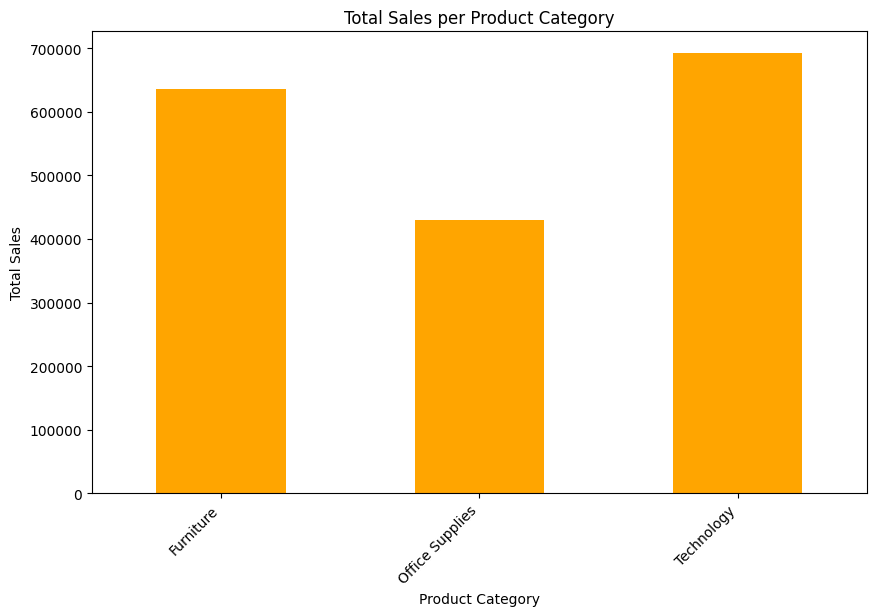

In [89]:
#9. Create a bar chart to visualise the total sales for each product category


import matplotlib.pyplot as plt
import numpy as np

#This gets the total sales per product by category and adds them up, then just need to plot this into a bar chart
total_sales_per_category = dfcopy.groupby('Category')['Total Sales'].sum()

# Plotting the bar chart
plt.figure(figsize=(10, 6))
total_sales_per_category.plot(kind='bar', color='orange')
plt.title('Total Sales per Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Sales')
plt.xticks(rotation=45, ha='right')  # Rotates x-axis labels for better readability
plt.show()

In [ ]:
#Q10 Create a scatter plot to expllore the relationship between sales and profit for each order



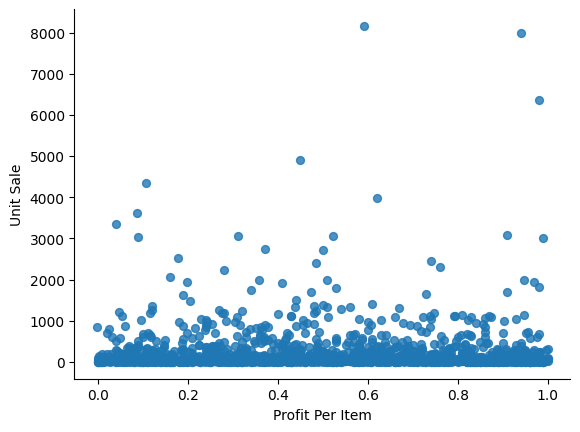

In [92]:
#Q10 Create a scatter plot to expllore the relationship between sales and profit for each order

#I used the suggestions given by google colab for this one!

from matplotlib import pyplot as plt
dfcopy.plot(kind='scatter', x='Profit Per Item', y='Unit Sale', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

<Figure size 1000x600 with 0 Axes>

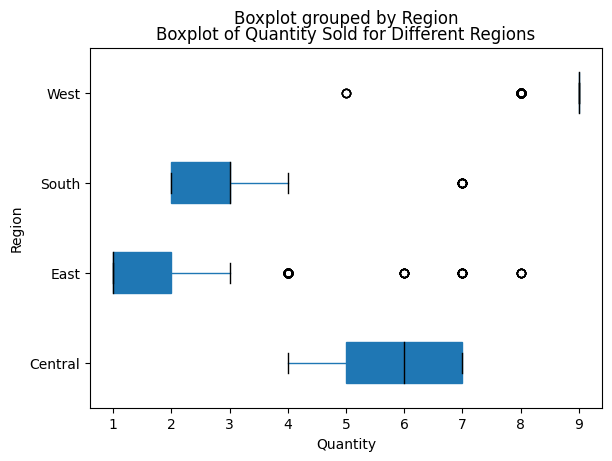

In [96]:
#Q11 Design a box plot to compare the distribution of quantity sold accross different regions.


plt.figure(figsize=(10, 6))
dfcopy.boxplot(column='Quantity', by='Region', grid=False, vert=False, patch_artist=True, medianprops={'color':'black'})
plt.title('Boxplot of Quantity Sold for Different Regions')
plt.xlabel('Quantity')
plt.ylabel('Region')
plt.show()